In [14]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [15]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)

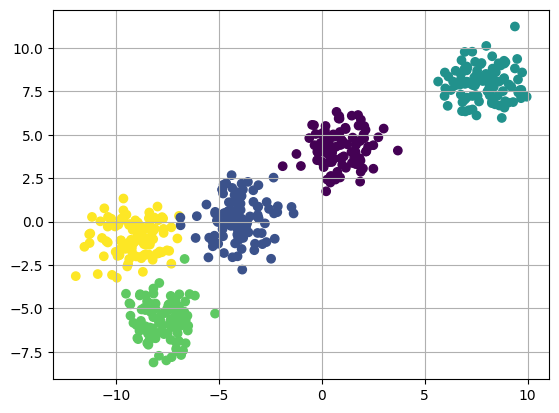

In [16]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [17]:
k = 5

colors = ['green','yellow','blue','cyan','red']

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
        'color' : colors[i]
    }
    clusters[i] = cluster

In [18]:
clusters

{0: {'center': array([3.11732477, 3.14520632]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-6.27248302, -3.24893493]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([ 7.42083725, -1.09336261]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 7.10306044, -5.50217303]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([1.84344654, 8.29927127]), 'points': [], 'color': 'red'}}

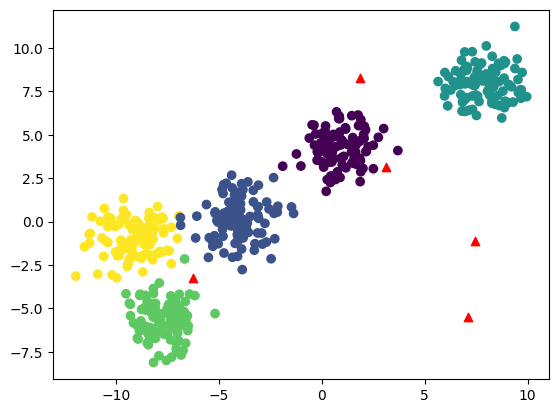

In [19]:
plt.scatter(X[:,0],X[:,1],c=y)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')

plt.show()

In [20]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [21]:
clusters

{0: {'center': array([3.11732477, 3.14520632]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-6.27248302, -3.24893493]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([ 7.42083725, -1.09336261]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 7.10306044, -5.50217303]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([1.84344654, 8.29927127]), 'points': [], 'color': 'red'}}

In [22]:
a = np.array([1,2])
b = np.array([3,4])
distance(a,b)

2.8284271247461903

In [25]:
def assign_clusters():
    # E-Step
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        
        for i in range(k):
            d = distance(curr_x,clusters[i]['center'])
            dist.append(d)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
        
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis = 0)
            clusters[idx]['center'] = new_center
            
            clusters[idx]['points'] = []
        
def plotClusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c = 'black',marker = '^')

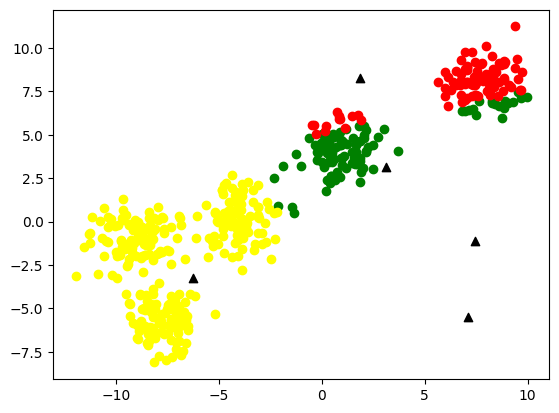

In [26]:
assign_clusters()
plotClusters()
update_clusters()

In [12]:
pt = np.array(clusters[0]['points'])

In [13]:
pt.mean(axis = 0)

C:\Users\Tanu\AppData\Local\Temp\ipykernel_4340\1975382720.py:1: RuntimeWarning: Mean of empty slice.
  pt.mean(axis = 0)
C:\Users\Tanu\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan